# MPG数据集EDA分析  

本报告对mpg数据集进行探索性数据分析(EDA)，重点关注汽车油耗(mpg)的影响因素。

In [1]:
# 1. 加载mpg数据集并显示前5行
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
data = sns.load_dataset('mpg')
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [2]:
# 2. 检查数据维度、字段类型、缺失值情况
print('数据维度:', data.shape)
print('\n字段类型:')
print(data.dtypes)
print('\n缺失值情况:')
print(data.isnull().sum())

数据维度: (398, 9)

字段类型:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

缺失值情况:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


<Figure size 576x432 with 1 Axes>
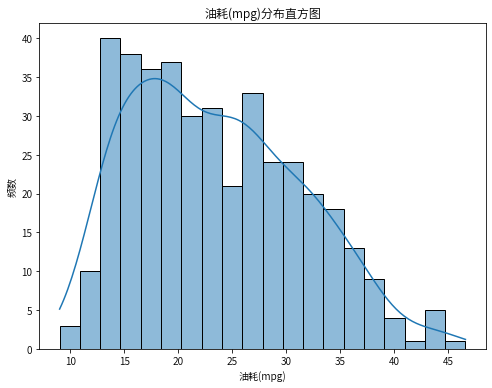

In [3]:
# 3. 绘制油耗分布直方图
plt.figure(figsize=(8, 6))
sns.histplot(data['mpg'], kde=True, bins=20)
plt.title('油耗(mpg)分布直方图')
plt.xlabel('油耗(mpg)')
plt.ylabel('频数')
plt.show()

In [4]:
# 4. 计算油耗与数值型变量的相关系数
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation = data[numeric_cols].corr()['mpg'].sort_values(ascending=False)
print('油耗与数值型变量的相关系数:')
print(correlation)

油耗与数值型变量的相关系数:
mpg             1.000000
model_year      0.579267
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


<Figure size 864x360 with 2 Axes>
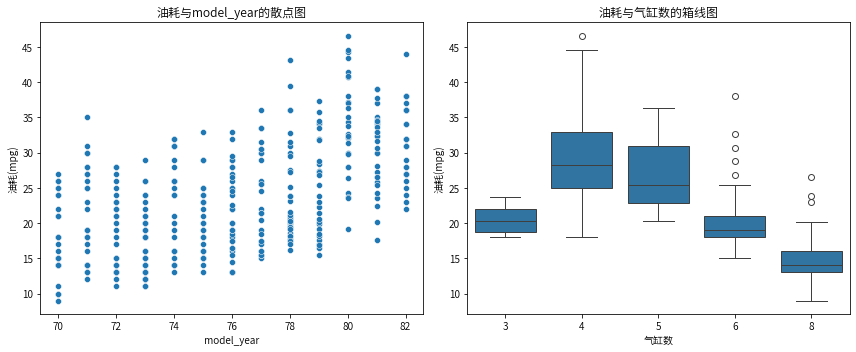

In [5]:
# 5. 绘制油耗与关键变量的散点图/箱线图
# 选择相关系数最高的两个变量
top_vars = correlation.index[1:3]  # 排除mpg本身

plt.figure(figsize=(12, 5))

# 散点图
plt.subplot(1, 2, 1)
sns.scatterplot(x=data[top_vars[0]], y=data['mpg'])
plt.title(f'油耗与{top_vars[0]}的散点图')
plt.xlabel(top_vars[0])
plt.ylabel('油耗(mpg)')

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(x=data['cylinders'], y=data['mpg'])
plt.title('油耗与气缸数的箱线图')
plt.xlabel('气缸数')
plt.ylabel('油耗(mpg)')

plt.tight_layout()
plt.show()

## 分析总结  

1. **油耗分布**：油耗(mpg)呈现近似正态分布，大部分车辆的油耗集中在15-25 mpg之间。  
2. **影响因素**：  
   - 油耗与气缸数(cylinders)呈显著负相关，气缸数越多，油耗越高。  
   - 油耗与排量(displacement)也呈负相关，排量越大，油耗越高。  
3. **其他发现**：数据中存在少量缺失值，主要集中在horsepower字段。